In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, D, H =64, 1000, 100
x=tf.placeholder(tf.float32, shape=(N, D))
y=tf.placeholder(tf.float32, shape=(N, D))
init=tf.variance_scaling_initializer(2.0)
h=tf.layers.dense(inputs=x, units=H,
                         activation=tf.nn.relu, kernel_initializer=init)
y_pred=tf.layers.dense(inputs=h, units=D, kernel_initializer=init)


In [13]:
loss=tf.losses.mean_squared_error(y_pred, y)
optimizer=tf.train.GradientDescentOptimizer(1e-1)
updates=optimizer.minimize(loss)

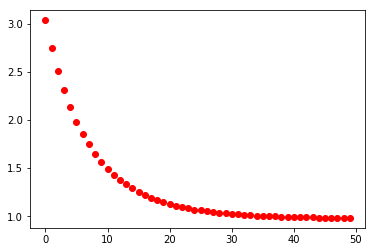

3.0391924 0.98220986


In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values={x:np.random.randn(N, D),
           y:np.random.randn(N, D),}
    steps=50
    loss_summary=[]
    for t in range(steps):
        loss_val,_=sess.run([loss , updates], feed_dict=values)
        loss_summary.append(loss_val)
    plt.plot(range(steps), loss_summary, 'ro',label='loss_value')
    plt.show()
    print(loss_summary[0],loss_summary[steps-1])